# Python для Анализа данных
Pipeline описательного анлиза данных

<img src="http://sharpsightlabs.com/wp-content/uploads/2016/05/1_data-analysis-for-ML_how-we-use-dataAnalysis_2016-05-16.png" />

In [61]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [62]:
# подгружаем данные
data = pd.read_csv('train_home_price.csv', index_col=0)
data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


Это нам уже известные данные о цене на дома. Цель этой задачи - научиться описывать/предсказывать цену на дом по каким-то его характеристикам. Давайте посмотрим на полный список доступных признаков:

In [63]:
sorted(data.columns.tolist())

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

Как мы видим, их довольно много. Сколько?

In [64]:
data.shape

(1460, 80)

Вот полное описание этих признаков:
    
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

Теперь давайте посмотрим, какого типа эти данные:

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Борьба с пропущенными значениями

Как мы видим, довольно много категориальных признаков. В то же время, качество данных вызывает вопросы, довольно много пропущенных значений. Давайте посмотрим сколько конкретно:

In [66]:
np.round(data.isna().sum()[data.isna().sum()>0] / data.shape[0], 2)

LotFrontage     0.18
Alley           0.94
MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
Electrical      0.00
FireplaceQu     0.47
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
PoolQC          1.00
Fence           0.81
MiscFeature     0.96
dtype: float64

С признаками, где слишком много пропусков, работать невозможно, поэтому избавимся от них:

In [67]:
features_with_na=data.isna().sum()[data.isna().sum()>0] / data.shape[0]
list_to_drop=features_with_na[features_with_na > 0.3].index.tolist()
list_to_drop

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [68]:
data.drop(list_to_drop, axis=1, inplace=True)

In [69]:
np.round(data.isna().sum()[data.isna().sum()>0] / data.shape[0], 2)

LotFrontage     0.18
MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
Electrical      0.00
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

Для всех остальных признаков сначала попробуем дропнуть строки с пропущенными значениями и посмотрим, сколько данных останется:

In [70]:
data.dropna().shape[0] / data.shape[0]

0.7493150684931507

Если бы мы так и сделали, то осталось бы примерно 75% данных, в принципе неплохо, это приемлимый вариант. Но давайте посмотрим, может быть мы можем лучше:
    
Посмотрим, сколько данных останется, если мы найдем чем заполнить пропуски в признаке LotFrontage:

In [71]:
data_=data.copy()
data_.LotFrontage.fillna(-1, inplace=True)
data_.dropna().shape[0] / data.shape[0]

0.9164383561643835

Ого! Останется 92% данных, давайте посмотрим чем мы можем заполнить пропуски и как это лучше сделать:

Сначала обратимся к описанию признака: (длина забора) 
    
* LotFrontage: Linear feet of street connected to property

Посмотрим на корреляцию признака LotFrontage c целевой переменной SalePrice:

In [72]:
data.LotFrontage.corr(data.SalePrice)

0.351799096570678

Теперь давайте посмотрим как будет меняться корреляция по мере заполнения пропусков различными методами:

In [73]:
list_to_check = [0, data.LotFrontage.min(), data.LotFrontage.max(), data.LotFrontage.mean(), data.LotFrontage.median(),\
                    data.LotFrontage.quantile(0.3), data.LotFrontage.quantile(0.4), data.LotFrontage.quantile(0.6),\
                    data.LotFrontage.quantile(0.7)]

list_of_names = ['0', 'min', 'max', 'mean', 'median', 'quantile 0.3', 'quantile 0.4', 'quantile 0.6', 'quantile 0.7']
list_of_methods = ['bfill', 'ffill']

In [74]:
for el in list_to_check:
    print('method: {}, correlation value: {:.4f}'.format(list_of_names[list_to_check.index(el)], \
                                                     data.LotFrontage.fillna(el).corr(data.SalePrice)))
for el in list_of_methods:
    print('method: {}, correlation value: {:.4f}'.format(el, \
                                                     data.LotFrontage.fillna(method=el).corr(data.SalePrice)))

method: 0, correlation value: 0.2096
method: min, correlation value: 0.2524
method: max, correlation value: 0.0813
method: mean, correlation value: 0.3349
method: median, correlation value: 0.3348
method: quantile 0.3, correlation value: 0.3292
method: quantile 0.4, correlation value: 0.3319
method: quantile 0.6, correlation value: 0.3344
method: quantile 0.7, correlation value: 0.3316
method: bfill, correlation value: 0.3028
method: ffill, correlation value: 0.2985


Как мы видим, из всех этих методов наилучшими выглядят среднее, медиана и квантили

Но может быть мы можем еще лучше? Давайте посмотрим на график распределения перменной LotFrontage.

In [75]:
data[['LotFrontage']]

,LotFrontage
Id,
1,65.0
2,80.0
3,68.0
4,60.0
5,84.0
...,...
1456,62.0
1457,85.0
1458,66.0


In [76]:
data[['LotFrontage']].describe()

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


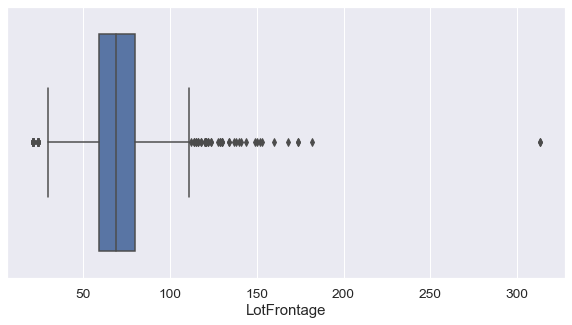

In [77]:
plt.figure(figsize=(10,5))
sns.boxplot(data.LotFrontage)
plt.show()

Много домов выше q(0.75)

**Идея:** а давайте разобьем целевую переменную на бины по квантилям связанной переменной, например, GrLivArea (жилая площадь). А затем посмотрим на распределения признака LotFrontage в разбивке по этим группам?

  GrLivArea: Above grade (ground) living area square feet

**Question:** корретно ли бить на квантили по переменной SalePrice? Какие сложности это может повлечь при обработке теста?

In [78]:
price_bins=data.GrLivArea.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
price_bins

0.0     334.0
0.1     912.0
0.2    1066.6
0.3    1208.0
0.4    1339.0
0.5    1464.0
0.6    1578.0
0.7    1709.3
0.8    1869.0
0.9    2158.3
1.0    5642.0
Name: GrLivArea, dtype: float64

In [79]:
data['LivAreaGroups'] = pd.cut(data['GrLivArea'], price_bins, \
                             labels=['0-0.25', '0.25-0.5', '0.5-0.3','0.3-0.4','0.4-0.5',\
                                     '0.5-0.6', '0.6-0.7', '0.7-0.8',\
                                     '0.8-0.9', '0.9-1'], right=True, include_lowest=True)

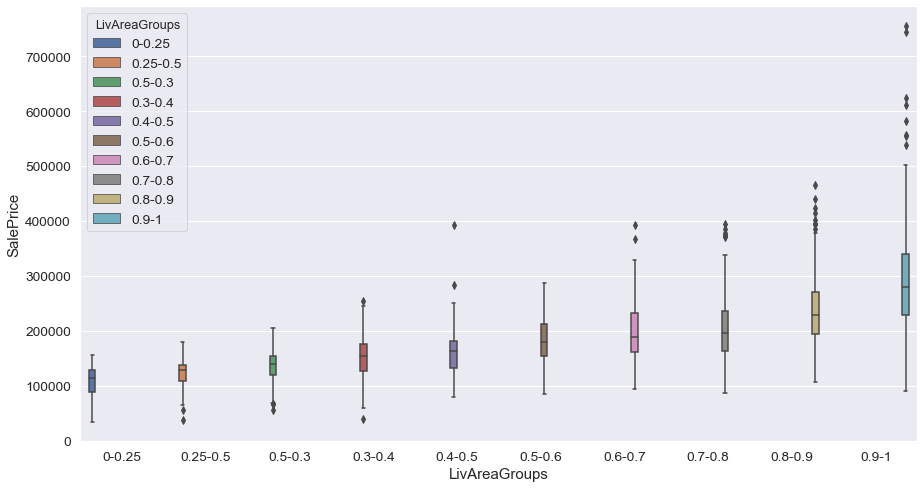

In [80]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, y='SalePrice', x='LivAreaGroups', hue='LivAreaGroups')

Давайте посмотрим, какая будет корреляция, если мы заполним пропуски средними по этим группам:

In [81]:
data.groupby('LivAreaGroups').GrLivArea.mean()

LivAreaGroups
0-0.25       818.176471
0.25-0.5     995.589928
0.5-0.3     1135.140940
0.3-0.4     1269.534722
0.4-0.5     1398.815068
0.5-0.6     1518.575342
0.6-0.7     1648.379310
0.7-0.8     1780.210884
0.8-0.9     2006.020690
0.9-1       2599.602740
Name: GrLivArea, dtype: float64

Заполняем значения средним внутри своей группы

In [82]:
data.groupby(['LivAreaGroups']).LotFrontage.transform(lambda x: x.fillna(x.mean())).round(0).corr(data.SalePrice)

0.36658141856715937

Как видим, корреляция повысилась. Давайте остановимся на этом варианте.

In [83]:
data.LotFrontage = data.groupby(['LivAreaGroups']).LotFrontage.transform(lambda x: x.fillna(x.mean())).round(0)

Давайте посмотрим какая доля пропущенных значений осталась:

In [84]:
data.isna().sum().shape[0] / data.shape[0]

0.052054794520547946

Оставшиеся пропуски можно либо чем-то заполнить, проведя соответствующий анализ, либо просто дропнуть. Я в этом анализе их дропну, а вам задача:
    
### Задача 1

Исследовать чем можно заполнить оставшиеся пропуски в данных и показать как это влияет на корреляцию с целевой переменной.

In [85]:
data.dropna(inplace=True)

# Корреляционный анализ 

Давайте теперь посмотрим на распределение цен на дома

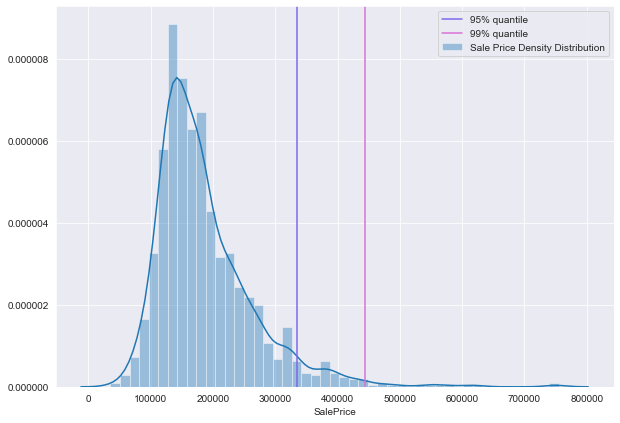

In [24]:
plt.subplots(figsize=(10,7))
sns.distplot(data['SalePrice'], label='Sale Price Density Distribution')
plt.axvline(data.SalePrice.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(data.SalePrice.quantile(0.99), label='99% quantile', c='orchid')
plt.legend()
plt.show()

На графике выше мы видим длинный тонкий хвост справа, в этом хвосте лежат "выбросы", те точки, что лежат за 95 и 99 квантилями. Судя по графику, имеет смысл дропнуть выбросы. Давайте так и поступим:

In [25]:
data=data.loc[data.SalePrice<data.SalePrice.quantile(0.99)]
data.shape

(1324, 76)

Теперь давайте посмотрим на распределение цены на дома в зависимости от зон:

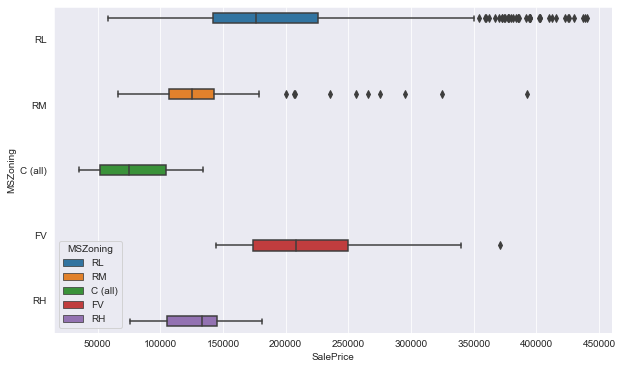

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='SalePrice', y='MSZoning', hue='MSZoning')
plt.show()

Как все признаки коррелируют с ценой и между собой?

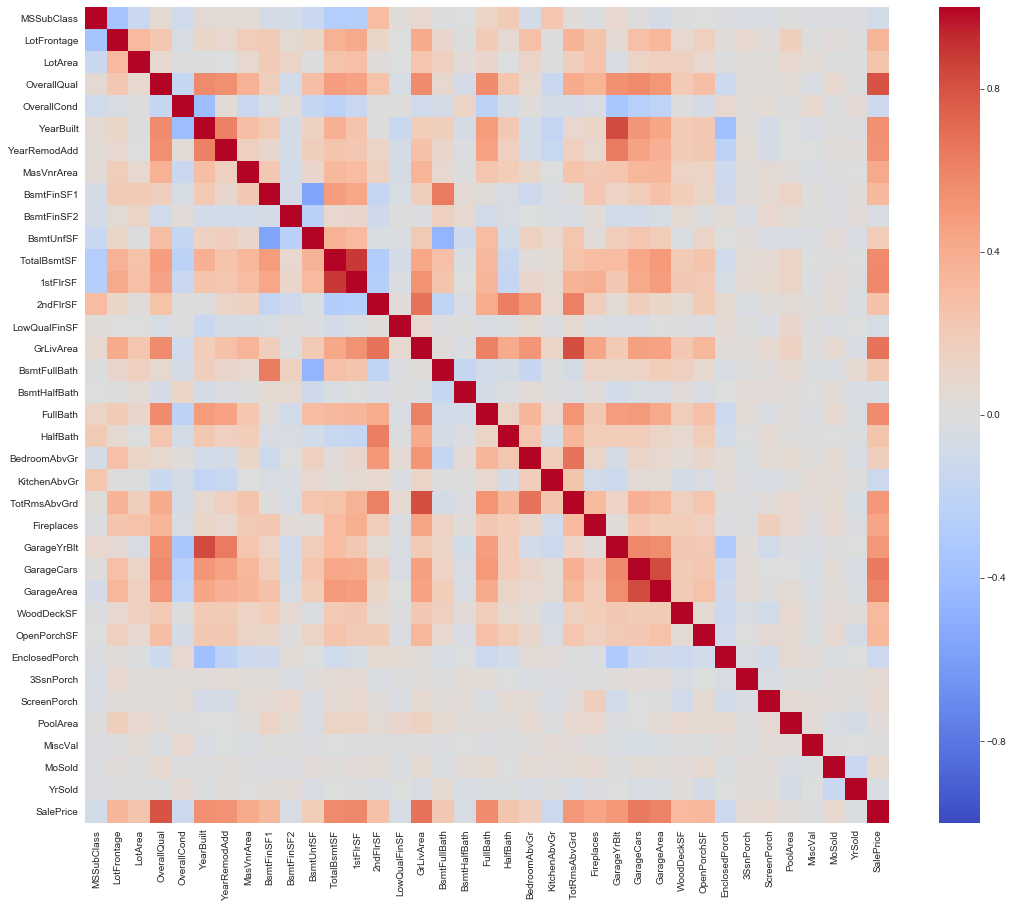

In [27]:
plt.subplots(figsize=(18,15))
sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10000), vmin=-1, center=0)
plt.show()

Это именно тот случай, когда признаков слишком много и графики становятся не читаемыми. В этом случае можно рисовать графики группами или же смотреть на первые k по корреляции:

In [28]:
k = 8 
corrmat = data.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index.tolist()
cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 '1stFlrSF',
 'TotalBsmtSF',
 'FullBath']

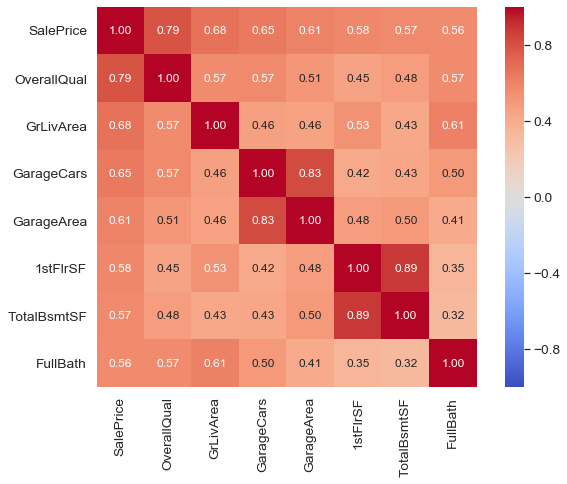

In [29]:
cm = np.corrcoef(data[cols].values.T)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},\
                yticklabels=cols, xticklabels=cols, vmin=-1, center=0,\
                    cmap=sns.color_palette('coolwarm',1000))
plt.show()

Давайте теперь посмотрим на графики парных зависимостей для топ 8 признаков по корреляции:

In [30]:
cols.append('LivAreaGroups')

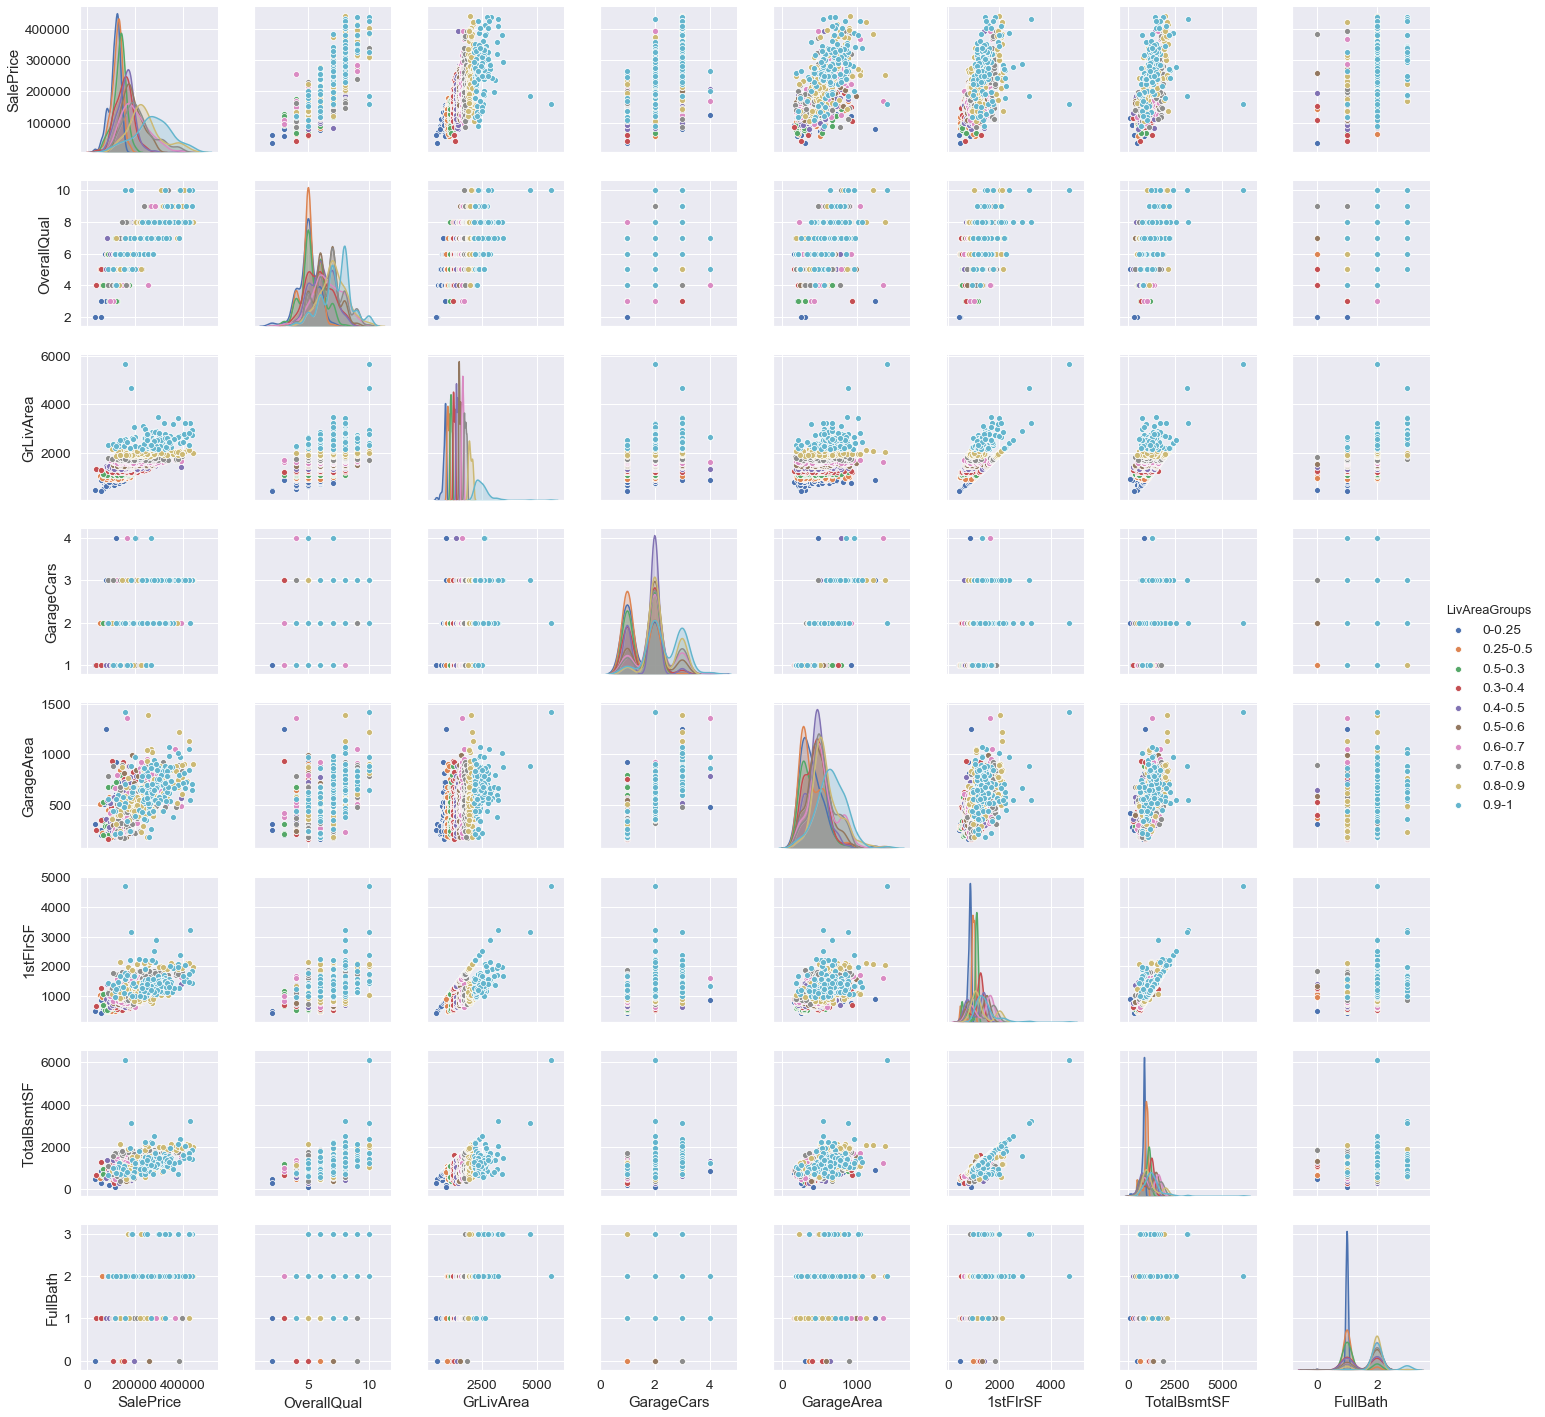

In [31]:
sns.pairplot(data=data[cols], hue='LivAreaGroups')
plt.show()

Как видите, график выше не особо читаемый по двум причинам: во-первых, слишком много признаков нарисовано сразу, во-вторых, разбивка по группам слишком детальная.

### Задача 3

Добавить на график выше разметку по цветам в зависимости от разбивки целевой переменной на 4 или 5 квантилей. При этом, нарисуйте только топ 5 признаков по корреляции.

Теперь давайте посмотрим на описательные статистики топ 5 признаков по корреляции:

In [32]:
data[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']].describe()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000
mean,182848.599698,6.185801,1521.533988,1.859517,497.801360
std,68780.196730,1.287856,494.025175,0.626856,183.943739
min,35311.000000,2.000000,438.000000,1.000000,160.000000
25%,135000.000000,5.000000,1154.750000,1.000000,371.500000
50%,167900.000000,6.000000,1477.500000,2.000000,484.000000
75%,216877.750000,7.000000,1779.000000,2.000000,576.000000
max,440000.000000,10.000000,5642.000000,4.000000,1418.000000


Теперь посмотрим на описательные статистики по категориальным признакам:

In [33]:
data.select_dtypes(include='object').describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1324,1324,1324,1324,1324,1324,1324,1324,1324,1324,...,1324,1324,1324,1324,1324,1324,1324,1324,1324,1324
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1053,1319,825,1193,1323,949,1252,209,1149,1310,...,1228,650,1241,844,579,1257,1273,1243,1151,1097


График распределения SalePrice по Overall Quality

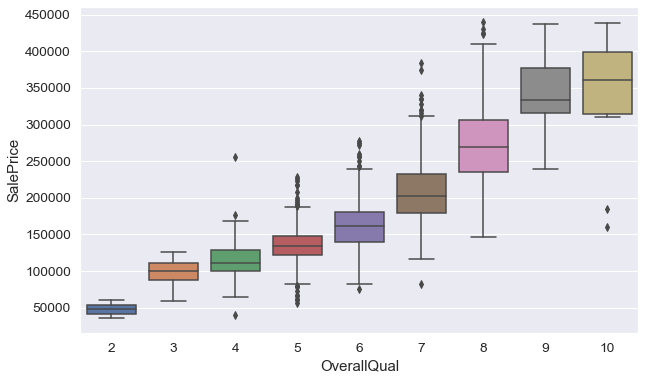

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='OverallQual', y="SalePrice")
plt.show()

# Распределение целевой переменной


Мы уже отмечали выше, что распределение целевой переменной похоже на нормальное. Но так ли это? Давайте попробуем зафитить на наши данные нормальное распределение и нарисуем теоретическое найденное распределение вместе с нашим реальным:

In [35]:
from scipy import stats
from scipy.stats import norm
norm.fit?

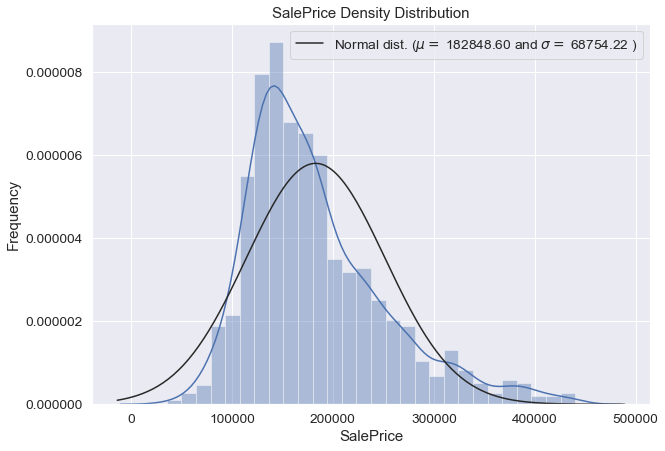

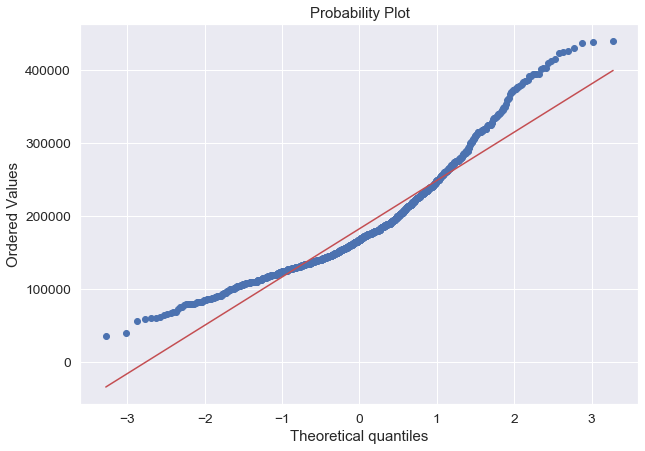

In [36]:
from scipy import stats
from scipy.stats import norm

plt.figure(figsize=(10,7))
sns.distplot(data.SalePrice, fit=norm)

# фитим распределение
(mu, sigma) = norm.fit(data.SalePrice)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Density Distribution')

plt.figure(figsize=(10,7))
stats.probplot(data['SalePrice'], plot=plt)
plt.show()

Как видим на графиках выше, наше распределение не совсем нормальное, т.е. оно скошено и имеет большую плотность в районе среднего, чем обычное нормальное. Давайте сделаем монотонное преобразование целевой переменной и посмотрим, станет ли лучше:

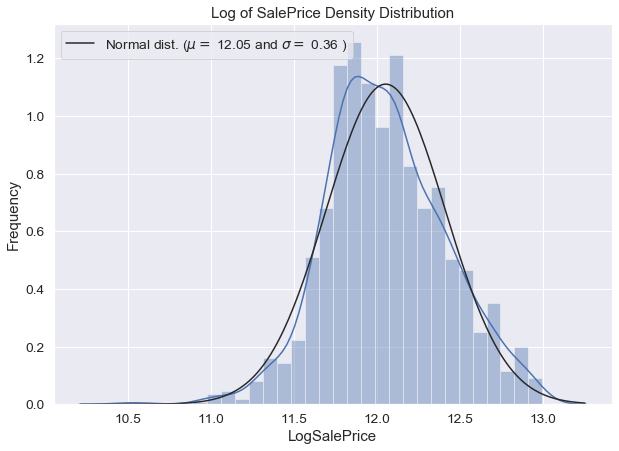

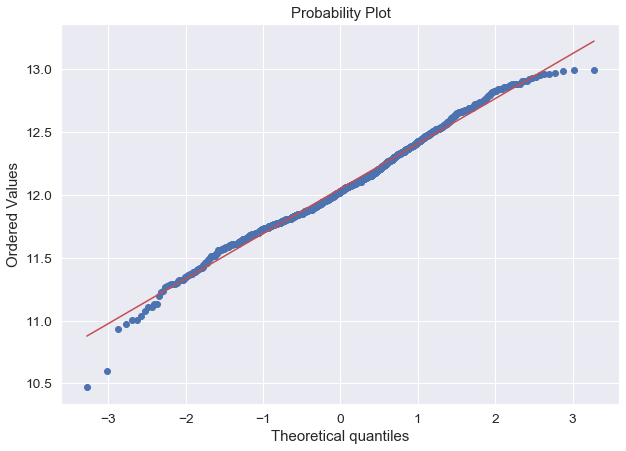

In [37]:
# берем логарифм от цены
data['LogSalePrice'] = np.log1p(data.SalePrice)

plt.figure(figsize=(10,7))
sns.distplot(data.LogSalePrice, fit=norm)

# фитим распределение на логарифм от цены
(mu, sigma) = norm.fit(data.LogSalePrice)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Log of SalePrice Density Distribution')

plt.figure(figsize=(10,7))
stats.probplot(data.LogSalePrice, plot=plt)
plt.show()

Как видно из графиков выше, стало гораздо лучше :)